# 0. npzファイルの読み込みと展開

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib as mpl
import importlib

In [2]:
npz =  np.load('C:/my_comp_train_XY/my_comp_train_XY.npz')
X_train = npz['X']
y_train = npz['y']

# 1. データをダウンロードする

In [3]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [4]:
y_train

array([0, 0, 0, ..., 9, 9, 9], dtype=uint8)

# 2. データを分析する

# 2-1. データラベルの分布の可視化

In [5]:
labels, label_count = np.unique(y_train, return_counts=True)
print(labels)
print(label_count)

[0 1 2 3 4 5 6 7 8 9]
[4146 3371 5362 4904 4089 3252 5326 5012 5851 4164]


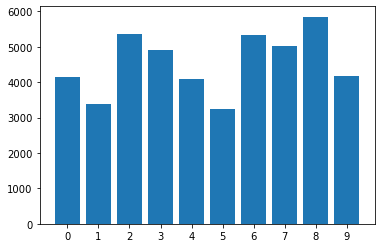

In [6]:
plt.bar(labels, label_count)
plt.xticks(range(0,10))
plt.show()

# 2-2. データ値の範囲の可視化

In [7]:
print(X_train.shape)
print(y_train.shape)

(45477, 28, 28)
(45477,)


In [8]:
#ravel関数による一次元配列の返却(データ数, 行, 列)
print(X_train.ravel().shape)

(35653968,)


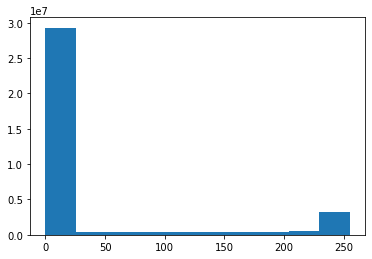

In [9]:
plt.hist(X_train.ravel())
plt.show()

縦軸：各データの中のピクセルの個数[10^7個]

In [10]:
#欠損値の数の計上
np.isnan(X_train.ravel()).sum()

0

# 2-3. 画像の表示

In [11]:
#randint関数(start, end, shape)でサイズを指定
noise = np.random.randint(0, 255, (len(X_train), 28,28))
X_train_mod = X_train + noise
y_train_mod = X_train

In [15]:
len(X_train)

45477

In [16]:
len(y_train)

45477

In [17]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
              interpolation="nearest")
    plt.axis("off")

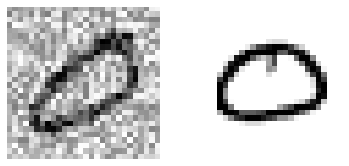

In [19]:
plt.subplot(121); plot_digit(X_train_mod[789])
plt.subplot(122); plot_digit(y_train_mod[234])
plt.show()

In [20]:
noise

array([[[214,  57, 251, ...,   4, 180,  75],
        [ 68, 103,   0, ..., 100, 166,  38],
        [127,  41, 117, ...,  25, 170,  47],
        ...,
        [130, 108, 220, ..., 141, 162,  96],
        [ 44, 164, 197, ...,  93, 138, 158],
        [248, 215, 103, ..., 244, 137, 154]],

       [[ 11, 169,  33, ...,  32, 170,  81],
        [106, 121,  30, ..., 200,  93, 167],
        [249, 231,  41, ..., 126,  40,  63],
        ...,
        [ 47,  41, 200, ...,  30, 248,  94],
        [171, 134, 224, ...,  70, 106,  88],
        [ 70, 222, 122, ..., 168, 105, 234]],

       [[179,  87,  80, ..., 253, 193, 108],
        [ 23,   5, 167, ..., 176,  51, 149],
        [227, 214, 166, ..., 175,  99, 200],
        ...,
        [ 62, 180,  71, ..., 227,  66, 126],
        [175,  96, 156, ..., 177, 253, 225],
        [207, 248, 229, ..., 183, 238,   4]],

       ...,

       [[126, 105, 179, ..., 241, 245, 224],
        [124, 103, 173, ..., 221,  27,  73],
        [218, 181,  31, ...,  78,  68, 226

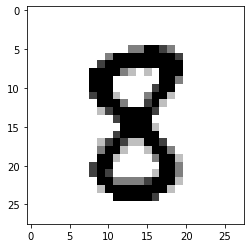

In [21]:
some_digit_01 = X_train[41203]
some_digit_01_image = some_digit_01.reshape(28, 28)
plt.imshow(some_digit_01_image, cmap='binary')
plt.show()

In [22]:
def show_image_by_label(X, y, target_label, show_num=6, figsize=(8,8), random=True):
    X_sub, y_sub = X[y==target_label],y[y==target_label]
    if random:
        rnd_idx = np.random.permutation(len(X_sub))[:show_num]
        X_sub, y_sub = X_sub[rnd_idx], y_sub[rnd_idx]
    X_sub, y_sub = X_sub[:show_num], y_sub[:show_num]
    
    rows, cols = np.ceil(show_num/2), 3
    plt.figure(figsize=figsize)
    print("Showing image with label:{}".format(target_label))
    for i, img in enumerate(X_sub):
        plt.subplot(rows, cols, i+1)
        plt.imshow(img, cmap="gray")
        plt.axis('off')
    plt.show()

Showing image with label:0


<ipython-input-22-5a3a668582df>:12: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(rows, cols, i+1)


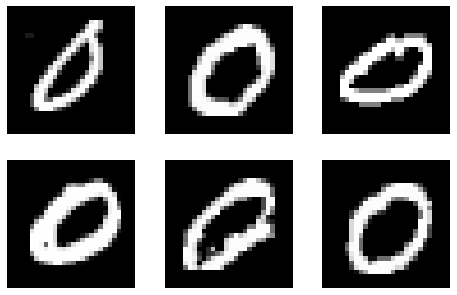

Showing image with label:1


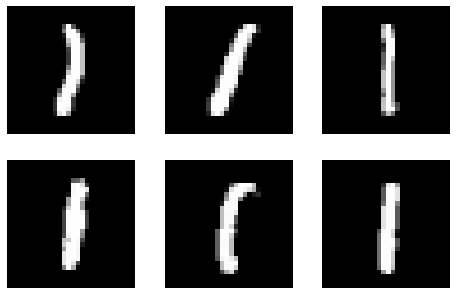

Showing image with label:2


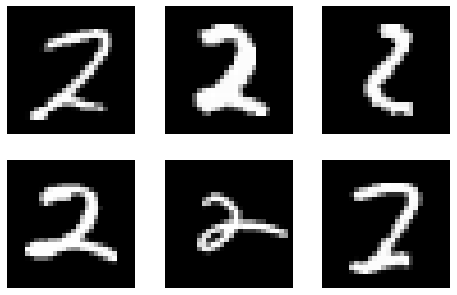

Showing image with label:3


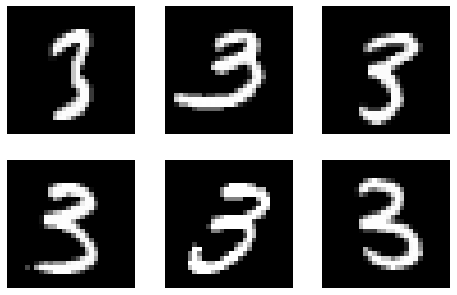

Showing image with label:4


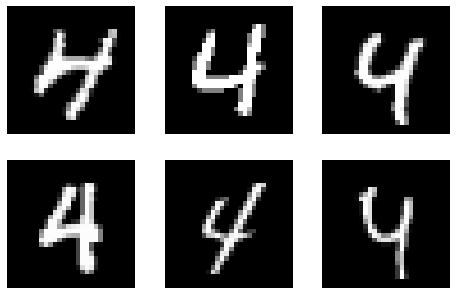

Showing image with label:5


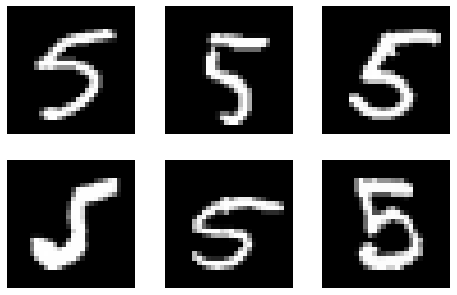

Showing image with label:6


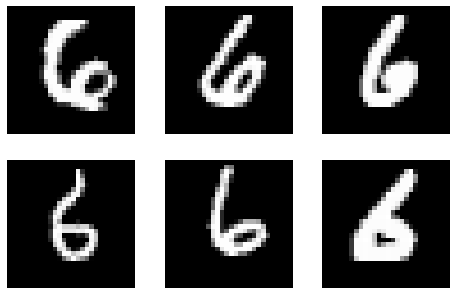

Showing image with label:7


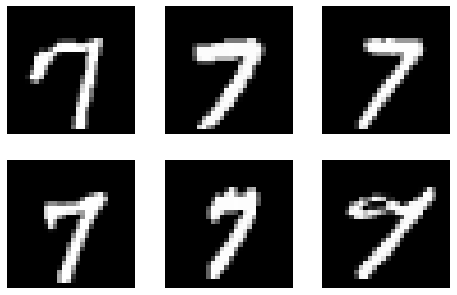

Showing image with label:8


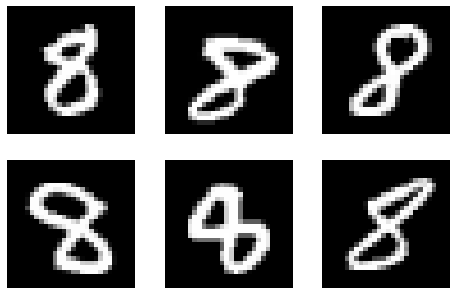

Showing image with label:9


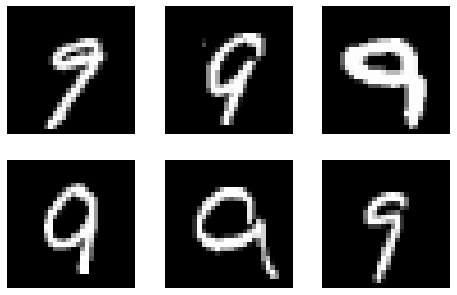

In [23]:
for label in np.unique(y_train):
    show_image_by_label(X_train, y_train, target_label=label)